In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import validation_curve
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
!pip install pydotplus
import pydotplus
from IPython.display import Image
from sklearn.model_selection import learning_curve 
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA

In [2]:
# supress warnings from plotnine

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline



In [3]:
# load data

credit_result1 = pd.read_csv("credit_result.csv")
credit_result1.head(10)

,ID,Bad,Good
0,5001711,0,4
1,5001712,0,19
2,5001713,0,22
3,5001714,0,15
4,5001715,0,60
5,5001717,0,22
6,5001718,2,37
7,5001719,0,43
8,5001720,7,29
9,5001723,0,31


In [4]:
# load data

app1 = pd.read_csv("app1.csv")
app1.head(10)

,ID,GENDER,Car,Property,Children,Income,Job,Education,Martial_Status,Housing,Age,Employed_Years,Family_Size
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59,3,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,62,-1001,1
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,62,-1001,1
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,62,-1001,1


In [5]:
# convert GENDER to numeric

app2 = pd.get_dummies(app1['GENDER'])

# using pd.concat to concatenate the dataframes
# df2 and df3 and storing the concatenated
# dataFrame in df.
app1 = pd.concat([app1, app2], axis=1).reindex(app1.index)

# removing the column 'GENDER' from df
# as it is of no use now.

app1.drop('GENDER', axis=1, inplace=True)

app1

,ID,Car,Property,Children,Income,Job,Education,Martial_Status,Housing,Age,Employed_Years,Family_Size,F,M
0,5008804,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,2,0,1
1,5008805,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,2,0,1
2,5008806,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59,3,2,0,1
3,5008808,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1,1,0
4,5008809,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438505,6840104,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,62,-1001,1,0,1
438506,6840222,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,44,8,1,1,0
438507,6841878,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,22,1,1,1,0
438508,6842765,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,59,-1001,2,1,0


In [6]:
# combine the housing above

housing_type = {'House / apartment' : 'House / apartment',
                   'With parents': 'With parents',
                    'Municipal apartment' : 'House / apartment',
                    'Rented apartment': 'House / apartment',
                    'Office apartment': 'House / apartment',
                    'Co-op apartment': 'House / apartment'}

app1["Housing"] = app1['Housing'].map(housing_type)

# convert Housing to numeric

app2 = pd.get_dummies(app1['Housing'])

# using pd.concat to concatenate the dataframes
# df2 and df3 and storing the concatenated
# dataFrame in df.
app1 = pd.concat([app1, app2], axis=1).reindex(app1.index)

# removing the column 'GENDER' from df
# as it is of no use now.
app1.drop('Housing', axis=1, inplace=True)
app1

,ID,Car,Property,Children,Income,Job,Education,Martial_Status,Age,Employed_Years,Family_Size,F,M,House / apartment,With parents
0,5008804,Y,Y,0,427500.0,Working,Higher education,Civil marriage,33,12,2,0,1,1,0
1,5008805,Y,Y,0,427500.0,Working,Higher education,Civil marriage,33,12,2,0,1,1,0
2,5008806,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,59,3,2,0,1,1,0
3,5008808,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,52,8,1,1,0,1,0
4,5008809,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,52,8,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438505,6840104,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,62,-1001,1,0,1,1,0
438506,6840222,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,44,8,1,1,0,1,0
438507,6841878,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,22,1,1,1,0,0,1
438508,6842765,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,59,-1001,2,1,0,1,0


In [7]:
# combine the jobs above

job_type = {'Commercial associate':'Working',
                  'State servant':'Working',
                  'Working':'Working',
                  'Pensioner':'Pensioner',
                  'Student':'Student'}

app1["Job"] = app1["Job"].map(job_type)

# convert Housing to numeric

app2 = pd.get_dummies(app1['Job'])

# using pd.concat to concatenate the dataframes
# df2 and df3 and storing the concatenated
# dataFrame in df.
app1 = pd.concat([app1, app2], axis=1).reindex(app1.index)

# removing the column 'Job' from df
# as it is of no use now.
app1.drop('Job', axis=1, inplace=True)
app1

,ID,Car,Property,Children,Income,Education,Martial_Status,Age,Employed_Years,Family_Size,F,M,House / apartment,With parents,Pensioner,Student,Working
0,5008804,Y,Y,0,427500.0,Higher education,Civil marriage,33,12,2,0,1,1,0,0,0,1
1,5008805,Y,Y,0,427500.0,Higher education,Civil marriage,33,12,2,0,1,1,0,0,0,1
2,5008806,Y,Y,0,112500.0,Secondary / secondary special,Married,59,3,2,0,1,1,0,0,0,1
3,5008808,N,Y,0,270000.0,Secondary / secondary special,Single / not married,52,8,1,1,0,1,0,0,0,1
4,5008809,N,Y,0,270000.0,Secondary / secondary special,Single / not married,52,8,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438505,6840104,N,Y,0,135000.0,Secondary / secondary special,Separated,62,-1001,1,0,1,1,0,1,0,0
438506,6840222,N,N,0,103500.0,Secondary / secondary special,Single / not married,44,8,1,1,0,1,0,0,0,1
438507,6841878,N,N,0,54000.0,Higher education,Single / not married,22,1,1,1,0,0,1,0,0,1
438508,6842765,N,Y,0,72000.0,Secondary / secondary special,Married,59,-1001,2,1,0,1,0,1,0,0


In [8]:
# combine the education above

education_type = {'Secondary / secondary special':'Some college',
                     'Lower secondary':'Some college',
                     'Higher education':'Some college',
                     'Incomplete higher':'Some college',
                     'Academic degree':'Academic degree'}

app1["Education"] = app1["Education"].map(education_type)

# convert Housing to numeric

app2 = pd.get_dummies(app1['Education'])

# using pd.concat to concatenate the dataframes
# df2 and df3 and storing the concatenated
# dataFrame in df.
app1 = pd.concat([app1, app2], axis=1).reindex(app1.index)

# removing the column 'Job' from df
# as it is of no use now.
app1.drop('Education', axis=1, inplace=True)
app1

,ID,Car,Property,Children,Income,Martial_Status,Age,Employed_Years,Family_Size,F,M,House / apartment,With parents,Pensioner,Student,Working,Academic degree,Some college
0,5008804,Y,Y,0,427500.0,Civil marriage,33,12,2,0,1,1,0,0,0,1,0,1
1,5008805,Y,Y,0,427500.0,Civil marriage,33,12,2,0,1,1,0,0,0,1,0,1
2,5008806,Y,Y,0,112500.0,Married,59,3,2,0,1,1,0,0,0,1,0,1
3,5008808,N,Y,0,270000.0,Single / not married,52,8,1,1,0,1,0,0,0,1,0,1
4,5008809,N,Y,0,270000.0,Single / not married,52,8,1,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438505,6840104,N,Y,0,135000.0,Separated,62,-1001,1,0,1,1,0,1,0,0,0,1
438506,6840222,N,N,0,103500.0,Single / not married,44,8,1,1,0,1,0,0,0,1,0,1
438507,6841878,N,N,0,54000.0,Single / not married,22,1,1,1,0,0,1,0,0,1,0,1
438508,6842765,N,Y,0,72000.0,Married,59,-1001,2,1,0,1,0,1,0,0,0,1


In [9]:
print(app1.dtypes)

ID                     int64
Car                   object
Property              object
Children               int64
Income               float64
Martial_Status        object
Age                    int64
Employed_Years         int64
Family_Size            int64
F                      uint8
M                      uint8
House / apartment      uint8
With parents           uint8
Pensioner              uint8
Student                uint8
Working                uint8
Academic degree        uint8
Some college           uint8
dtype: object


In [10]:
martial_status = {'Single / not married':'Single',
                     'Separated':'Single',
                     'Widow':'Single',
                     'Civil marriage':'Married',
                    'Married':'Married'}

app1["Martial_Status"] = app1["Martial_Status"].map(martial_status)


# convert Martial_Status to numeric

app2 = pd.get_dummies(app1['Martial_Status'])

# using pd.concat to concatenate the dataframes
# df2 and df3 and storing the concatenated
# dataFrame in df.
app1 = pd.concat([app1, app2], axis=1).reindex(app1.index)

# removing the column 'GENDER' from df
# as it is of no use now.
app1.drop('Martial_Status', axis=1, inplace=True)
app1

,ID,Car,Property,Children,Income,Age,Employed_Years,Family_Size,F,M,House / apartment,With parents,Pensioner,Student,Working,Academic degree,Some college,Married,Single
0,5008804,Y,Y,0,427500.0,33,12,2,0,1,1,0,0,0,1,0,1,1,0
1,5008805,Y,Y,0,427500.0,33,12,2,0,1,1,0,0,0,1,0,1,1,0
2,5008806,Y,Y,0,112500.0,59,3,2,0,1,1,0,0,0,1,0,1,1,0
3,5008808,N,Y,0,270000.0,52,8,1,1,0,1,0,0,0,1,0,1,0,1
4,5008809,N,Y,0,270000.0,52,8,1,1,0,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438505,6840104,N,Y,0,135000.0,62,-1001,1,0,1,1,0,1,0,0,0,1,0,1
438506,6840222,N,N,0,103500.0,44,8,1,1,0,1,0,0,0,1,0,1,0,1
438507,6841878,N,N,0,54000.0,22,1,1,1,0,0,1,0,0,1,0,1,0,1
438508,6842765,N,Y,0,72000.0,59,-1001,2,1,0,1,0,1,0,0,0,1,1,0


In [11]:
# drop columns

app1=app1.drop(columns=['Car','Property','Children','F'])
app1

,ID,Income,Age,Employed_Years,Family_Size,M,House / apartment,With parents,Pensioner,Student,Working,Academic degree,Some college,Married,Single
0,5008804,427500.0,33,12,2,1,1,0,0,0,1,0,1,1,0
1,5008805,427500.0,33,12,2,1,1,0,0,0,1,0,1,1,0
2,5008806,112500.0,59,3,2,1,1,0,0,0,1,0,1,1,0
3,5008808,270000.0,52,8,1,0,1,0,0,0,1,0,1,0,1
4,5008809,270000.0,52,8,1,0,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438505,6840104,135000.0,62,-1001,1,1,1,0,1,0,0,0,1,0,1
438506,6840222,103500.0,44,8,1,0,1,0,0,0,1,0,1,0,1
438507,6841878,54000.0,22,1,1,0,0,1,0,0,1,0,1,0,1
438508,6842765,72000.0,59,-1001,2,0,1,0,1,0,0,0,1,1,0


In [12]:
# drop columns

app1=app1.drop(columns=['Single'])
app1

,ID,Income,Age,Employed_Years,Family_Size,M,House / apartment,With parents,Pensioner,Student,Working,Academic degree,Some college,Married
0,5008804,427500.0,33,12,2,1,1,0,0,0,1,0,1,1
1,5008805,427500.0,33,12,2,1,1,0,0,0,1,0,1,1
2,5008806,112500.0,59,3,2,1,1,0,0,0,1,0,1,1
3,5008808,270000.0,52,8,1,0,1,0,0,0,1,0,1,0
4,5008809,270000.0,52,8,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438505,6840104,135000.0,62,-1001,1,1,1,0,1,0,0,0,1,0
438506,6840222,103500.0,44,8,1,0,1,0,0,0,1,0,1,0
438507,6841878,54000.0,22,1,1,0,0,1,0,0,1,0,1,0
438508,6842765,72000.0,59,-1001,2,0,1,0,1,0,0,0,1,1


In [13]:
# rename columns

app1.rename(columns = {'M':'Male'}, inplace=True)




app1



,ID,Income,Age,Employed_Years,Family_Size,Male,House / apartment,With parents,Pensioner,Student,Working,Academic degree,Some college,Married
0,5008804,427500.0,33,12,2,1,1,0,0,0,1,0,1,1
1,5008805,427500.0,33,12,2,1,1,0,0,0,1,0,1,1
2,5008806,112500.0,59,3,2,1,1,0,0,0,1,0,1,1
3,5008808,270000.0,52,8,1,0,1,0,0,0,1,0,1,0
4,5008809,270000.0,52,8,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438505,6840104,135000.0,62,-1001,1,1,1,0,1,0,0,0,1,0
438506,6840222,103500.0,44,8,1,0,1,0,0,0,1,0,1,0
438507,6841878,54000.0,22,1,1,0,0,1,0,0,1,0,1,0
438508,6842765,72000.0,59,-1001,2,0,1,0,1,0,0,0,1,1


In [14]:
credit_result1

,ID,Bad,Good
0,5001711,0,4
1,5001712,0,19
2,5001713,0,22
3,5001714,0,15
4,5001715,0,60
...,...,...,...
45980,5150482,0,18
45981,5150483,0,18
45982,5150484,0,13
45983,5150485,0,2


In [15]:
# Status will be based on will column in credit_result1 has more
# good = more good than bad (1)
# bad = more bad than good (0)

In [16]:
credit_result1.loc[(credit_result1['Good'] > credit_result1['Bad']),'Status'] = 1
credit_result1.loc[(credit_result1['Good'] <= credit_result1['Bad']),'Status'] = 0
credit_result1['Status'] = credit_result1['Status'].astype(int)
credit_result1

,ID,Bad,Good,Status
0,5001711,0,4,1
1,5001712,0,19,1
2,5001713,0,22,1
3,5001714,0,15,1
4,5001715,0,60,1
...,...,...,...,...
45980,5150482,0,18,1
45981,5150483,0,18,1
45982,5150484,0,13,1
45983,5150485,0,2,1


In [17]:
# merge credit_result1 with app1

credit_app = app1.merge(credit_result1, how='inner', on=['ID'])
credit_app

,ID,Income,Age,Employed_Years,Family_Size,Male,House / apartment,With parents,Pensioner,Student,Working,Academic degree,Some college,Married,Bad,Good,Status
0,5008804,427500.0,33,12,2,1,1,0,0,0,1,0,1,1,1,15,1
1,5008805,427500.0,33,12,2,1,1,0,0,0,1,0,1,1,1,14,1
2,5008806,112500.0,59,3,2,1,1,0,0,0,1,0,1,1,0,30,1
3,5008808,270000.0,52,8,1,0,1,0,0,0,1,0,1,0,0,5,1
4,5008809,270000.0,52,8,1,0,1,0,0,0,1,0,1,0,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,315000.0,48,7,2,1,1,0,0,0,1,0,1,1,4,8,1
36453,5149834,157500.0,34,4,2,0,1,0,0,0,1,0,1,1,18,6,0
36454,5149838,157500.0,34,4,2,0,1,0,1,0,0,0,1,1,18,15,0
36455,5150049,283500.0,49,2,2,0,1,0,0,0,1,0,1,1,2,8,1


In [18]:
# rename columns

credit_app.rename(columns = {'Bad':'Bad_acc'}, inplace=True)




credit_app



,ID,Income,Age,Employed_Years,Family_Size,Male,House / apartment,With parents,Pensioner,Student,Working,Academic degree,Some college,Married,Bad_acc,Good,Status
0,5008804,427500.0,33,12,2,1,1,0,0,0,1,0,1,1,1,15,1
1,5008805,427500.0,33,12,2,1,1,0,0,0,1,0,1,1,1,14,1
2,5008806,112500.0,59,3,2,1,1,0,0,0,1,0,1,1,0,30,1
3,5008808,270000.0,52,8,1,0,1,0,0,0,1,0,1,0,0,5,1
4,5008809,270000.0,52,8,1,0,1,0,0,0,1,0,1,0,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,315000.0,48,7,2,1,1,0,0,0,1,0,1,1,4,8,1
36453,5149834,157500.0,34,4,2,0,1,0,0,0,1,0,1,1,18,6,0
36454,5149838,157500.0,34,4,2,0,1,0,1,0,0,0,1,1,18,15,0
36455,5150049,283500.0,49,2,2,0,1,0,0,0,1,0,1,1,2,8,1


In [19]:
# rename columns

credit_app.rename(columns = {'Good':'Good_acc'}, inplace=True)




credit_app

,ID,Income,Age,Employed_Years,Family_Size,Male,House / apartment,With parents,Pensioner,Student,Working,Academic degree,Some college,Married,Bad_acc,Good_acc,Status
0,5008804,427500.0,33,12,2,1,1,0,0,0,1,0,1,1,1,15,1
1,5008805,427500.0,33,12,2,1,1,0,0,0,1,0,1,1,1,14,1
2,5008806,112500.0,59,3,2,1,1,0,0,0,1,0,1,1,0,30,1
3,5008808,270000.0,52,8,1,0,1,0,0,0,1,0,1,0,0,5,1
4,5008809,270000.0,52,8,1,0,1,0,0,0,1,0,1,0,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,315000.0,48,7,2,1,1,0,0,0,1,0,1,1,4,8,1
36453,5149834,157500.0,34,4,2,0,1,0,0,0,1,0,1,1,18,6,0
36454,5149838,157500.0,34,4,2,0,1,0,1,0,0,0,1,1,18,15,0
36455,5150049,283500.0,49,2,2,0,1,0,0,0,1,0,1,1,2,8,1


In [20]:
# rename columns

credit_app.rename(columns = {'Male':'Gender_M'}, inplace=True)




credit_app.head()

,ID,Income,Age,Employed_Years,Family_Size,Gender_M,House / apartment,With parents,Pensioner,Student,Working,Academic degree,Some college,Married,Bad_acc,Good_acc,Status
0,5008804,427500.0,33,12,2,1,1,0,0,0,1,0,1,1,1,15,1
1,5008805,427500.0,33,12,2,1,1,0,0,0,1,0,1,1,1,14,1
2,5008806,112500.0,59,3,2,1,1,0,0,0,1,0,1,1,0,30,1
3,5008808,270000.0,52,8,1,0,1,0,0,0,1,0,1,0,0,5,1
4,5008809,270000.0,52,8,1,0,1,0,0,0,1,0,1,0,0,5,1


<AxesSubplot:>

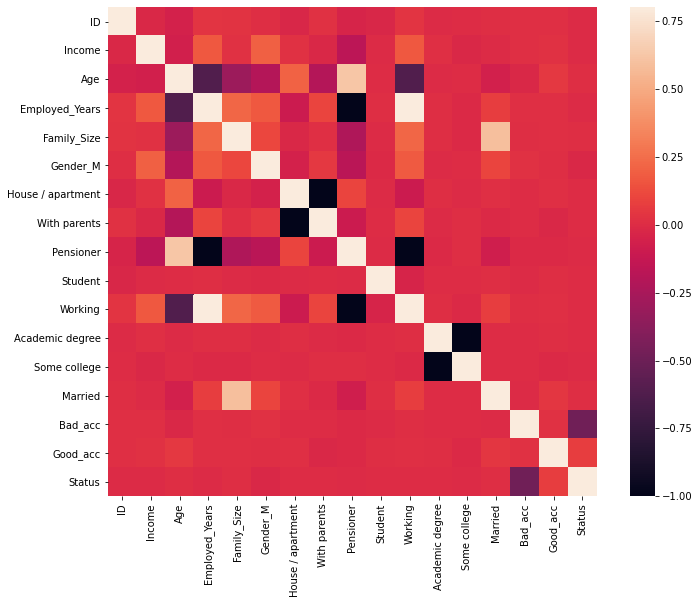

In [21]:
# heat map of correlation of features

correlation_matrix = credit_app.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)

In [22]:
credit_app.shape

(36457, 17)

In [23]:
credit_app.isnull().any().sum()

0

Text(0, 0.5, 'Frequency')

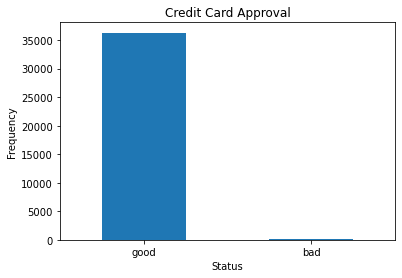

In [24]:
labels = ['good','bad']
classes = pd.value_counts(credit_app['Status'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Credit Card Approval")
plt.xticks(range(2), labels)
plt.xlabel("Status")
plt.ylabel("Frequency")

In [25]:
# unbalanced data

In [26]:
#Split the variables
# drop ID, Bad_acc, Good_acc columns

X = credit_app.iloc[:, :-1].drop(['ID', 'Good_acc', 'Bad_acc'], axis = 1)
y = credit_app.iloc[:, -1]

X.head()

,Income,Age,Employed_Years,Family_Size,Gender_M,House / apartment,With parents,Pensioner,Student,Working,Academic degree,Some college,Married
0,427500.0,33,12,2,1,1,0,0,0,1,0,1,1
1,427500.0,33,12,2,1,1,0,0,0,1,0,1,1
2,112500.0,59,3,2,1,1,0,0,0,1,0,1,1
3,270000.0,52,8,1,0,1,0,0,0,1,0,1,0
4,270000.0,52,8,1,0,1,0,0,0,1,0,1,0


In [27]:
y

0        1
1        1
2        1
3        1
4        1
        ..
36452    1
36453    0
36454    0
36455    1
36456    1
Name: Status, Length: 36457, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split


# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=111)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

X_train.head()

(25519, 13)
(10938, 13)
(25519,)
(10938,)


,Income,Age,Employed_Years,Family_Size,Gender_M,House / apartment,With parents,Pensioner,Student,Working,Academic degree,Some college,Married
32250,351000.0,44,23,3,1,1,0,0,0,1,0,1,1
4682,180000.0,60,15,1,0,1,0,0,0,1,0,1,0
11362,315000.0,60,3,2,1,1,0,0,0,1,0,1,1
26188,306000.0,54,1,2,1,1,0,0,0,1,0,1,1
23153,180000.0,27,3,2,1,1,0,0,0,1,0,1,1


In [29]:
# combine X & Y train for sampling

train_df = pd.concat([X_train, y_train], axis = 1)
train_df.shape

(25519, 14)

In [30]:
train_df.head()

,Income,Age,Employed_Years,Family_Size,Gender_M,House / apartment,With parents,Pensioner,Student,Working,Academic degree,Some college,Married,Status
32250,351000.0,44,23,3,1,1,0,0,0,1,0,1,1,1
4682,180000.0,60,15,1,0,1,0,0,0,1,0,1,0,1
11362,315000.0,60,3,2,1,1,0,0,0,1,0,1,1,1
26188,306000.0,54,1,2,1,1,0,0,0,1,0,1,1,1
23153,180000.0,27,3,2,1,1,0,0,0,1,0,1,1,1


In [31]:
# Isolate goods and bads

train_df_good = train_df[train_df['Status'] == 1]
train_df_bad = train_df[train_df['Status'] == 0]

print(train_df_good.shape)
print(train_df_bad.shape)

(25406, 14)
(113, 14)


In [32]:
# under sampling so training has 10k records for good customers


train_df_good_undersampled = train_df_good.sample(10000)
train_df_good_undersampled.head()

,Income,Age,Employed_Years,Family_Size,Gender_M,House / apartment,With parents,Pensioner,Student,Working,Academic degree,Some college,Married,Status
29664,135000.0,49,9,3,1,1,0,0,0,1,0,1,1,1
769,135000.0,39,9,1,1,1,0,0,0,1,0,1,0,1
1118,90000.0,48,22,3,0,1,0,0,0,1,0,1,1,1
27041,157500.0,57,5,2,0,1,0,0,0,1,0,1,1,1
30816,202500.0,44,10,4,1,1,0,0,0,1,0,1,1,1


In [33]:
# oversample data so training has 10% of good records that become bad

train_df_bad_oversampled = train_df_bad.sample(1000, replace = True)
train_df_bad_oversampled.head()

,Income,Age,Employed_Years,Family_Size,Gender_M,House / apartment,With parents,Pensioner,Student,Working,Academic degree,Some college,Married,Status
22822,225000.0,38,6,2,1,1,0,0,0,1,0,1,1,0
20647,202500.0,31,7,2,0,1,0,0,0,1,0,1,1,0
13957,135000.0,63,-1001,2,1,1,0,1,0,0,0,1,1,0
36273,202500.0,38,4,2,1,0,1,0,0,1,0,1,1,0
36350,225000.0,53,1,1,1,1,0,0,0,1,0,1,0,0


(11000, 14)


<AxesSubplot:title={'center':'count (target)'}>

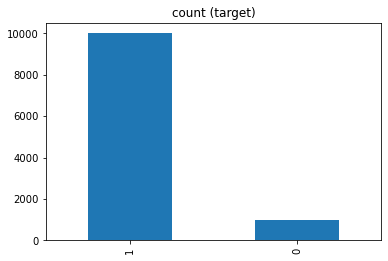

In [34]:
train_df_resampled = pd.concat([train_df_bad_oversampled, train_df_good_undersampled], axis = 0)
print(train_df_resampled.shape)

train_df_resampled['Status'].value_counts().plot(kind='bar', title='count (target)')

In [35]:
#bad went up and good went down !

In [36]:
# split sample data to X and y train

X_train = train_df_resampled.iloc[:,:-1]
y_train = train_df_resampled.iloc[:,-1]

print(X_train.shape)
print(y_train.shape)

(11000, 13)
(11000,)


In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
#### Logistic Regression

from sklearn.linear_model import LogisticRegression


# instantiate the Logistic Regression classifier
logreg = LogisticRegression(class_weight='balanced')


# fit the classifier to the imbalanced data
clf = logreg.fit(X_train, y_train)


# predict on the training data
y_pred = clf.predict(X_test)

In [39]:
# create confusion matrix

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

def conf_matrix(y_test, pred_test):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)

The f1 score for the testing data: 0.9975254330492164
Confusion Matrix : 
[[    0    54]
 [    0 10884]]


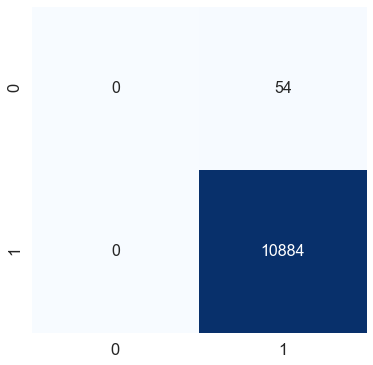

In [40]:
# f1 score

#Calculating and printing the f1 score

f1_test = f1_score(y_test, y_pred)
print('The f1 score for the testing data:', f1_test)

#Ploting the confusion matrix

from sklearn.metrics import confusion_matrix

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))
conf_matrix(y_test, y_pred)

In [41]:
# import the metric
from sklearn.metrics import classification_report


# print classification report
print("Classification Report:\n\n", classification_report(y_test, y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       1.00      1.00      1.00     10884

    accuracy                           1.00     10938
   macro avg       0.50      0.50      0.50     10938
weighted avg       0.99      1.00      0.99     10938



In [42]:
# import the accuracy metric
from sklearn.metrics import accuracy_score


# print the accuracy
accuracy = accuracy_score(y_pred, y_test)

print("Accuracy : %.2f%%" % (accuracy * 100.0))

Accuracy : 99.51%


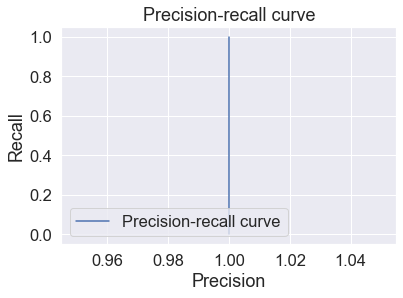

In [43]:
from sklearn.metrics import precision_recall_curve 

precision, recall, thresholds = precision_recall_curve(y_pred, y_test)

# create plot
plt.plot(precision, recall, label='Precision-recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-recall curve')
plt.legend(loc="lower left")

In [44]:
#Grid Search

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test,y_pred_acc)

Accuracy Score : 0.9950630828304992
Precision Score : 0.9950630828304992
Recall Score : 1.0
F1 Score : 0.9975254330492164


array([[    0,    54],
       [    0, 10884]])

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

#CV scores, 5 fold CV
scores = cross_val_score(logreg, X_train, y_train, cv=5)

#Prediction and accuracy
y_pred = logreg.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)

#Print the summary
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print ("Test Accuracy: %0.2f" % (accuracy_test))

Accuracy: 0.58 (+/- 0.58)
Test Accuracy: 1.00


In [46]:
# tune hyperparameters

#import GridseachCV
from sklearn.model_selection import GridSearchCV

#Instantiate
clf = LogisticRegression()

#Grid
parameter_grid = {'C': [0.01, 0.1, 1, 2, 10, 100], 'penalty': ['l1', 'l2']}

#Gridsearch
gridsearch = GridSearchCV(clf, parameter_grid)
gridsearch.fit(X_train, y_train);

#Get best hyperparameters
gridsearch.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [47]:
#scale data

from sklearn import preprocessing
import numpy as np

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)

In [48]:
# fit random forest classifier

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.989
Random Forest: f1-score=0.990


13


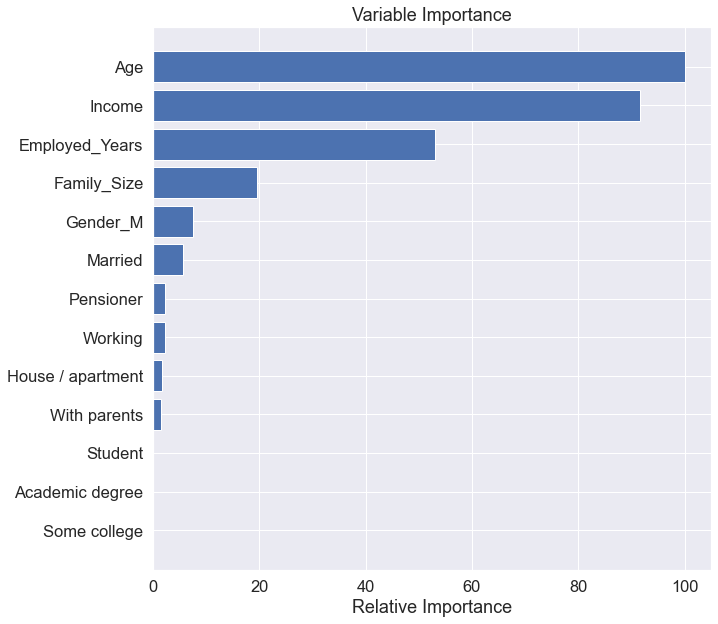

In [49]:
# Plot feature importances

feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [50]:
# Age, Income, and Employed Years are driving factors in model prediction


In [51]:
# define model

model = RandomForestClassifier(n_estimators=10, class_weight='balanced')

In [52]:
# class balanced random forest for imbalanced classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

# define model
model = RandomForestClassifier(n_estimators=10, class_weight='balanced')

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.873


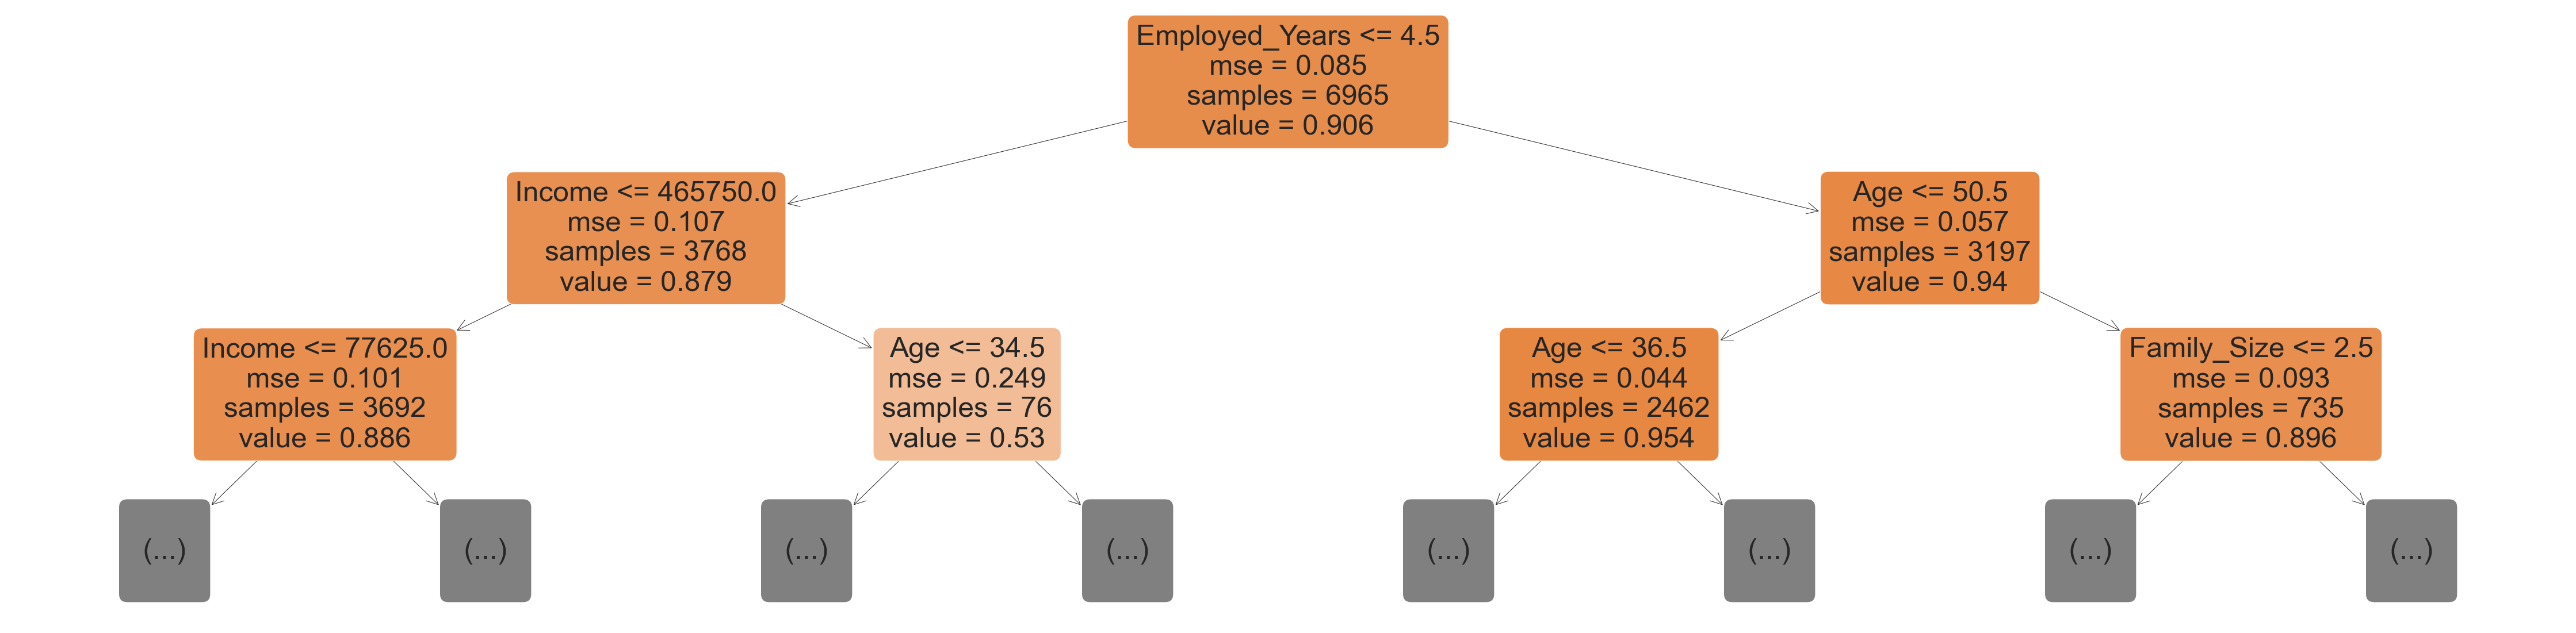

In [53]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 42)
model.fit(X_train, y_train)
model.score(X_train, y_train)

from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True);


In [54]:
base_model = RandomForestRegressor(random_state = 42, n_jobs=-1).fit(X_train, y_train)
base_train_acc = base_model.score(X_train, y_train)
base_test_acc = base_model.score(X_test, y_test)
base_acc=base_train_acc,base_test_acc
base_acc

(0.9163517600927615, -1.1541534346694977)